### Importing TensorFlow , numpy and matplotlib

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl

### load data 

In [2]:
eruptions,waiting = np.loadtxt('original.csv', usecols=(0,1), delimiter=',', skiprows=1, unpack=True)
with open("original.csv", "r") as f:
    data = np.loadtxt(f, delimiter=',', skiprows=1)
    x,y = data.transpose()

### show plot (point)

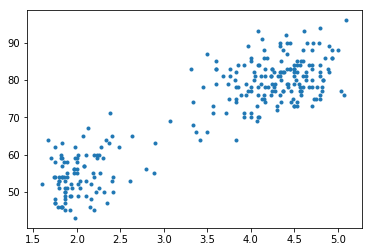

In [3]:
pl.plot(eruptions, waiting, '.')
pl.show()

### initial some nodes

In [4]:
w = tf.Variable([.3])
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)
linear_model = w * x + b

In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(linear_model, {x: eruptions}))

[ 0.78000003  0.24000001  0.69990003  0.38490003  1.05990005  0.56489998
  1.1099999   0.78000003  0.28500003  1.00500011  0.24989998  0.87510008
  0.95999998  0.22500002  1.1099999   0.35010004  0.22500002  1.1400001
  0.18000001  0.97500008  0.24000001  0.22500002  0.73500007  0.62010002
  1.05990005  0.78000003  0.29010004  0.92490011  0.85499996  1.02990007
  0.99000007  1.0401001   0.71010011  0.90990001  0.84990007  0.30510002
  0.26010001  1.1499002   0.24989998  1.13490009  1.00500011  0.26490003
  1.07010007  0.22500002  1.05990005  0.69510001  0.84990007  0.32999998
  1.08990002  0.30000001  1.1400001   1.11479998  0.24989998  1.1499002
  0.21990001  1.16490006  0.81510001  0.2001      1.07010007  0.99509996
  0.36990005  1.04999995  0.22500002  1.1400001   0.24510002  1.01999998
  0.9501      1.1099999   0.32010001  1.1099999   0.90990001  0.29010004
  1.04999995  0.90000004  0.2949      1.22009993  0.30510002  1.07010007
  0.86490005  0.78000003  0.93989998  0.99990004  0.9

In [6]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
cost = tf.reduce_sum(squared_deltas)
print(sess.run(cost, {x: eruptions, y: waiting}))

1.38639e+06


In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.00001)
train = optimizer.minimize(cost)

In [8]:
sess.run(init) # reset values to incorrect defaults.
for i in range(100):
  sess.run(train, {x: eruptions, y: waiting})

print(sess.run([w, b, cost], {x: eruptions, y: waiting}))

[array([ 17.94443893], dtype=float32), array([ 5.79117203], dtype=float32), 29546.984]


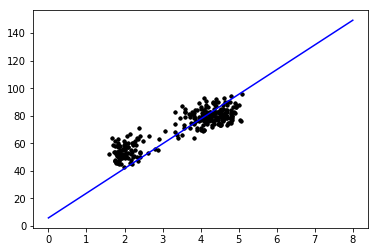

In [11]:
i = np.linspace(0,8,1000)
j = w.eval(sess)[0]
k = b.eval(sess)[0]
l = j * i + k
pl.plot(eruptions,waiting,'k.')
pl.plot(i,l,'b-')
pl.show()

In [ ]:
np.polyfit()

In [13]:
w.eval(sess)

array([ 17.94443893], dtype=float32)